<a href="https://colab.research.google.com/github/Ozksmnburhan/machine-learning/blob/main/bfs_dfs_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

graph yapısı

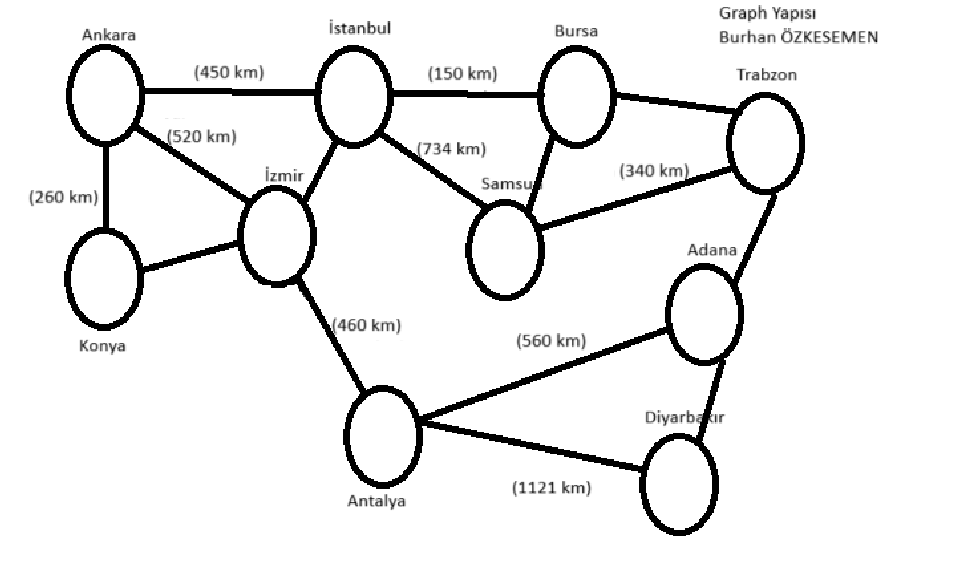

In [4]:
graph = {
    'Ankara': [('İstanbul', 450), ('İzmir', 520), ('Konya', 260), ('Adana', 490), ('Samsun', 410)],
    'İstanbul': [('Ankara', 450), ('Bursa', 150)],
    'İzmir': [('Ankara', 520), ('Antalya', 460)],
    'Antalya': [('İzmir', 460), ('Konya', 300), ('Adana', 560)],
    'Bursa': [('İstanbul', 150)],
    'Konya': [('Ankara', 260), ('Antalya', 300)],
    'Adana': [('Ankara', 490), ('Antalya', 560)],
    'Samsun': [('Ankara', 410), ('Trabzon', 340)],
    'Trabzon': [('Samsun', 340), ('Diyarbakır', 470)],
    'Diyarbakır': [('Trabzon', 470)]
}


In [6]:
from collections import deque

def bfs(graph, start, goal):
    queue = deque([[start]])
    visited = set()

    if start == goal:
        return [start]

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node not in visited:
            neighbors = graph[node]

            for neighbor, _ in neighbors:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

                if neighbor == goal:
                    return new_path

            visited.add(node)

    return None

bfs_result = bfs(graph, 'Ankara', 'Antalya')
print(f"BFS ile Ankara-Antalya arasındaki en kısa yol: {bfs_result}")


BFS ile Ankara-Antalya arasındaki en kısa yol: ['Ankara', 'İzmir', 'Antalya']


In [7]:
def dfs(graph, start, goal, path=None, visited=None):
    if visited is None:
        visited = set()
    if path is None:
        path = []

    path.append(start)
    visited.add(start)

    if start == goal:
        return path

    for neighbor, _ in graph[start]:
        if neighbor not in visited:
            result = dfs(graph, neighbor, goal, path, visited)
            if result:
                return result

    path.pop()
    return None

dfs_result = dfs(graph, 'Ankara', 'Antalya')
print(f"DFS ile Ankara-Antalya arasında bulunan yol: {dfs_result}")


DFS ile Ankara-Antalya arasında bulunan yol: ['Ankara', 'İzmir', 'Antalya']


In [9]:
def bfs_with_iterations(graph, start, goal):
    queue = deque([[start]])
    visited = set()
    iterations = 0

    while queue:
        path = queue.popleft()
        node = path[-1]
        iterations += 1

        if node not in visited:
            neighbors = graph[node]
            for neighbor, _ in neighbors:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

                if neighbor == goal:
                    return new_path, iterations
            visited.add(node)

    return None, iterations

def dfs_with_iterations(graph, start, goal, path=None, visited=None, iterations=0):
    if visited is None:
        visited = set()
    if path is None:
        path = []

    path.append(start)
    visited.add(start)
    iterations += 1

    if start == goal:
        return path, iterations

    for neighbor, _ in graph[start]:
        if neighbor not in visited:
            result, iterations = dfs_with_iterations(graph, neighbor, goal, path, visited, iterations)
            if result:
                return result, iterations

    path.pop()
    return None, iterations
# Running BFS and DFS with iterations
bfs_result_with_iterations, bfs_iterations = bfs_with_iterations(graph, 'Ankara', 'Antalya')
dfs_result_with_iterations, dfs_iterations = dfs_with_iterations(graph, 'Ankara', 'Antalya')

print(f"BFS result with iterations: {bfs_result_with_iterations}, Iterations: {bfs_iterations}")
print(f"DFS result with iterations: {dfs_result_with_iterations}, Iterations: {dfs_iterations}")

BFS result with iterations: ['Ankara', 'İzmir', 'Antalya'], Iterations: 3
DFS result with iterations: ['Ankara', 'İzmir', 'Antalya'], Iterations: 5


Ağaç Yapısı

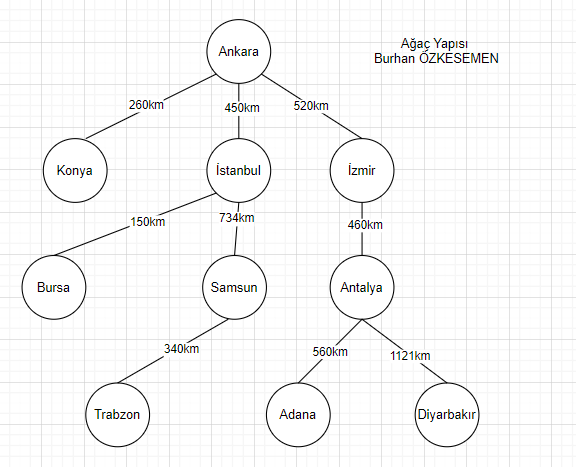

In [1]:
tree = {
    'Ankara': [('Konya', 260), ('İstanbul', 450), ('İzmir', 520)],
    'İstanbul': [('Bursa', 150), ('Samsun', 734)],
    'İzmir': [('Antalya', 460)],
    'Antalya': [('Adana', 560), ('Diyarbakır', 1121)],
    'Samsun': [('Trabzon', 340)],
    'Bursa': [],
    'Konya': [],
    'Trabzon': [],
    'Adana': [],
    'Diyarbakır': []
}


In [2]:
from collections import deque

# BFS for the tree structure
def bfs(tree, start, goal):
    queue = deque([[start]])
    visited = set()

    if start == goal:
        return [start]

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node not in visited:
            neighbors = tree[node]

            for neighbor, _ in neighbors:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

                if neighbor == goal:
                    return new_path

            visited.add(node)

    return None

# DFS for the tree structure
def dfs(tree, start, goal, path=None, visited=None):
    if visited is None:
        visited = set()
    if path is None:
        path = []

    path.append(start)
    visited.add(start)

    if start == goal:
        return path

    for neighbor, _ in tree[start]:
        if neighbor not in visited:
            result = dfs(tree, neighbor, goal, path, visited)
            if result:
                return result

    path.pop()
    return None

# Running BFS and DFS
bfs_result = bfs(tree, 'Ankara', 'Antalya')
dfs_result = dfs(tree, 'Ankara', 'Antalya')

print(f"BFS result for Ankara-Antalya: {bfs_result}")
print(f"DFS result for Ankara-Antalya: {dfs_result}")


BFS result for Ankara-Antalya: ['Ankara', 'İzmir', 'Antalya']
DFS result for Ankara-Antalya: ['Ankara', 'İzmir', 'Antalya']


In [3]:
# BFS with iteration counting
def bfs_with_iterations(tree, start, goal):
    queue = deque([[start]])
    visited = set()
    iterations = 0

    while queue:
        path = queue.popleft()
        node = path[-1]
        iterations += 1

        if node not in visited:
            neighbors = tree[node]
            for neighbor, _ in neighbors:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)

                if neighbor == goal:
                    return new_path, iterations
            visited.add(node)

    return None, iterations

# DFS with iteration counting
def dfs_with_iterations(tree, start, goal, path=None, visited=None, iterations=0):
    if visited is None:
        visited = set()
    if path is None:
        path = []

    path.append(start)
    visited.add(start)
    iterations += 1

    if start == goal:
        return path, iterations

    for neighbor, _ in tree[start]:
        if neighbor not in visited:
            result, iterations = dfs_with_iterations(tree, neighbor, goal, path, visited, iterations)
            if result:
                return result, iterations

    path.pop()
    return None, iterations

# iterations
bfs_result_with_iterations, bfs_iterations = bfs_with_iterations(tree, 'Ankara', 'Antalya')
dfs_result_with_iterations, dfs_iterations = dfs_with_iterations(tree, 'Ankara', 'Antalya')

print(f"BFS result with iterations: {bfs_result_with_iterations}, Iterations: {bfs_iterations}")
print(f"DFS result with iterations: {dfs_result_with_iterations}, Iterations: {dfs_iterations}")


BFS result with iterations: ['Ankara', 'İzmir', 'Antalya'], Iterations: 4
DFS result with iterations: ['Ankara', 'İzmir', 'Antalya'], Iterations: 8
